In [136]:
# Install packages
import pandas as pd
import numpy as np

In [137]:
df = pd.read_excel("/content/sample_data/COVID_Data.xlsx")

In [138]:
df.head()

,Date,Positive cases,Active cases,Recovered,Death
0,2020-09-01,2967,2967,1137,40
1,2020-09-02,3420,3420,2383,32
2,2020-09-03,3189,3189,2631,29
3,2020-09-04,2963,2963,1732,25
4,2020-09-05,3093,3093,3226,34


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            211 non-null    datetime64[ns]
 1   Positive cases  211 non-null    int64         
 2   Active cases    211 non-null    int64         
 3   Recovered       211 non-null    int64         
 4   Death           211 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.4 KB


In [140]:
df.shape

(211, 5)

In [141]:
df.isnull().sum()

,0
Date,0
Positive cases,0
Active cases,0
Recovered,0
Death,0


In [142]:
print(df.columns)

Index(['Date', 'Positive cases', 'Active cases', 'Recovered', 'Death'], dtype='object')


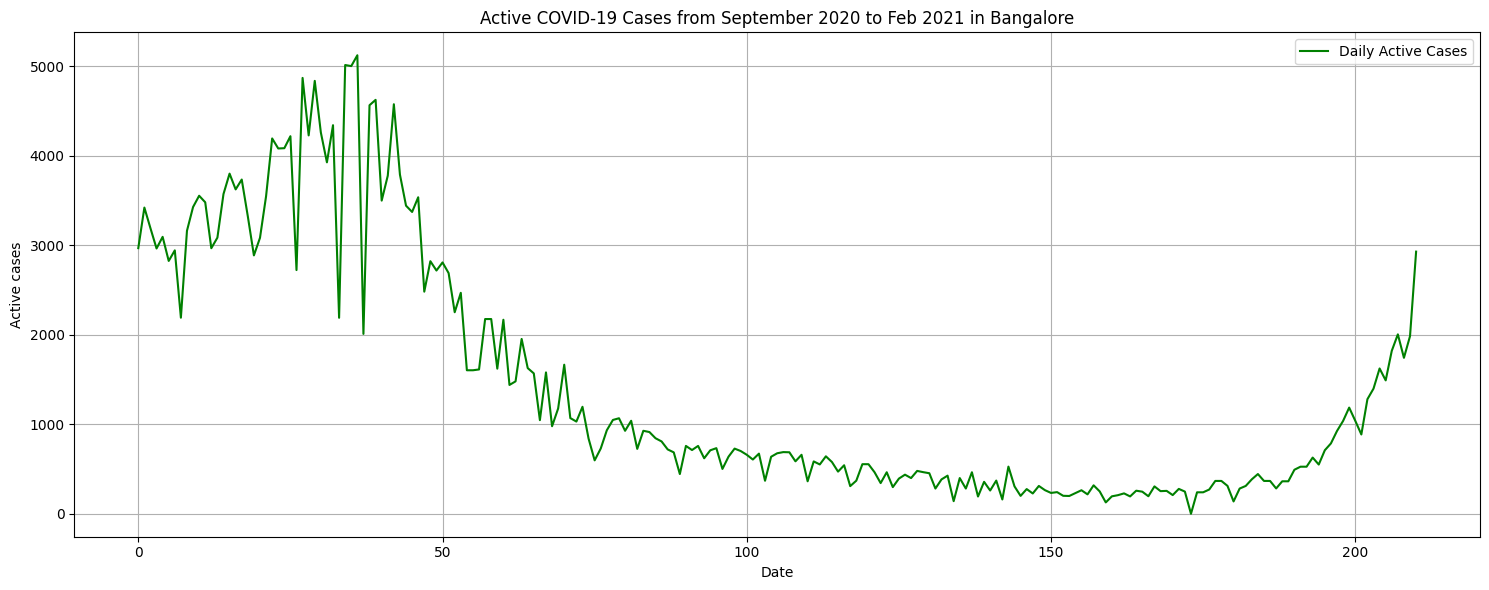

In [144]:
active = df['Active cases']
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(active, label='Daily Active Cases', color='green')
plt.title('Active COVID-19 Cases from September 2020 to Feb 2021 in Bangalore')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

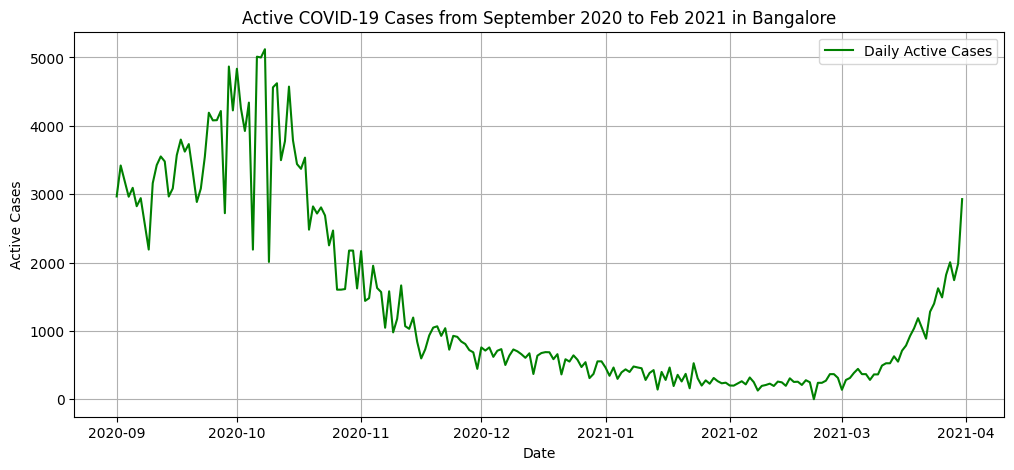

In [135]:
active = df['Active cases']

#Focus only on prediction of Active cases in Bangalore
plt.figure(figsize=(12,5))
plt.plot(active, label='Daily Active Cases', color='green')
plt.title("Active COVID-19 Cases from September 2020 to Feb 2021 in Bangalore")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [132]:
df['Date'] = pd.to_datetime(df['Date'])
#chnage the format of Date on y axis
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [112]:
active = df['Active cases']
positive = df['Positive cases']
recovered = df['Recovered']
death = df['Death']

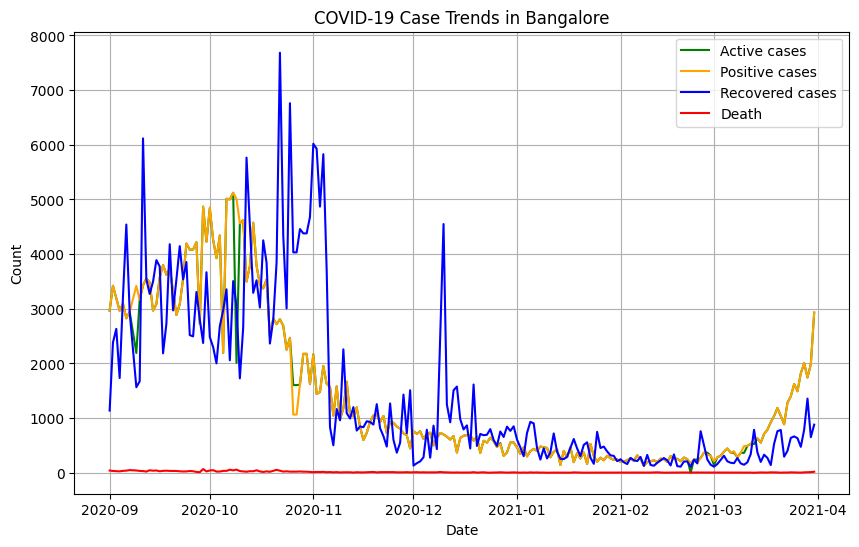

In [117]:
#plot for all the cases
plt.figure(figsize=(10, 6))
plt.plot(df['Active cases'], label='Active cases', color='green')
plt.plot(df['Positive cases'], label='Positive cases', color='orange')
plt.plot(df['Recovered'], label='Recovered cases', color='blue')
plt.plot(df['Death'], label='Death', color='red')
plt.title('COVID-19 Case Trends in Bangalore')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
#check for the scope of data
start_date = "2020-09-01"
end_date = "2021-03-31"
filtered_df = df.loc[start_date:end_date]

/tmp/ipython-input-1859360375.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Active cases'].resample('M').mean()


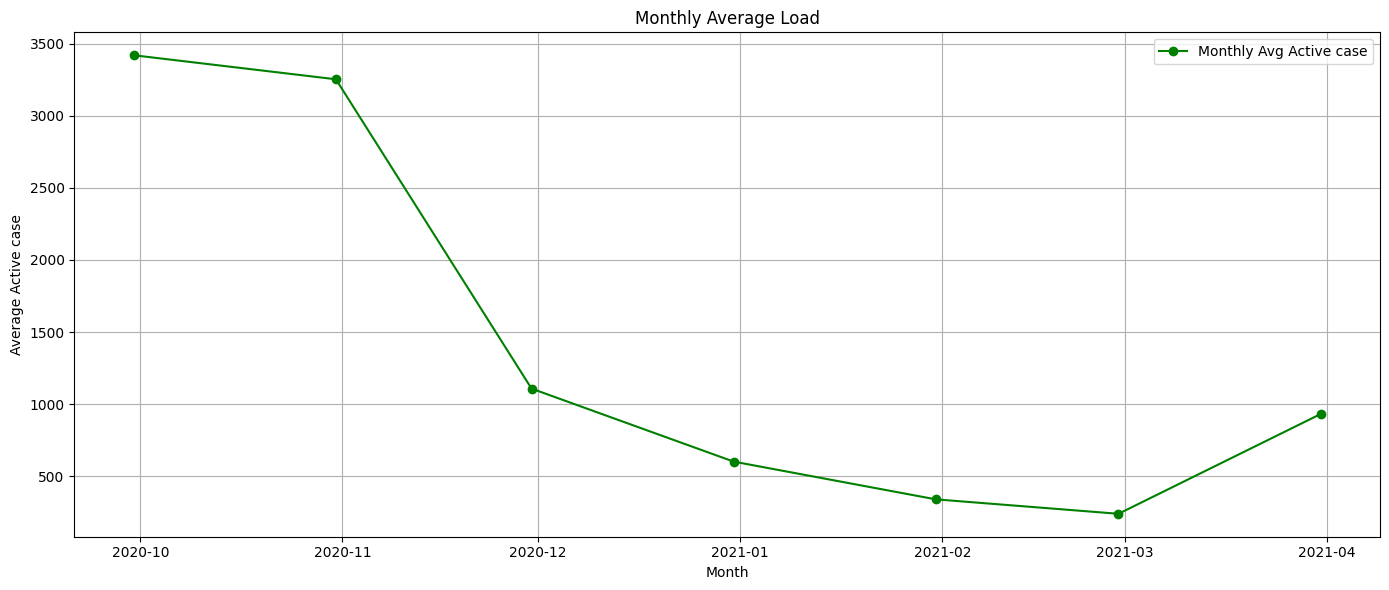

In [63]:
monthly_avg = df['Active cases'].resample('M').mean()

#Resample by month and calculate mean
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg, marker='o', color='green', label='Monthly Avg Active case')
plt.title('Monthly Average Load')
plt.xlabel('Month')
plt.ylabel('Average Active case')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

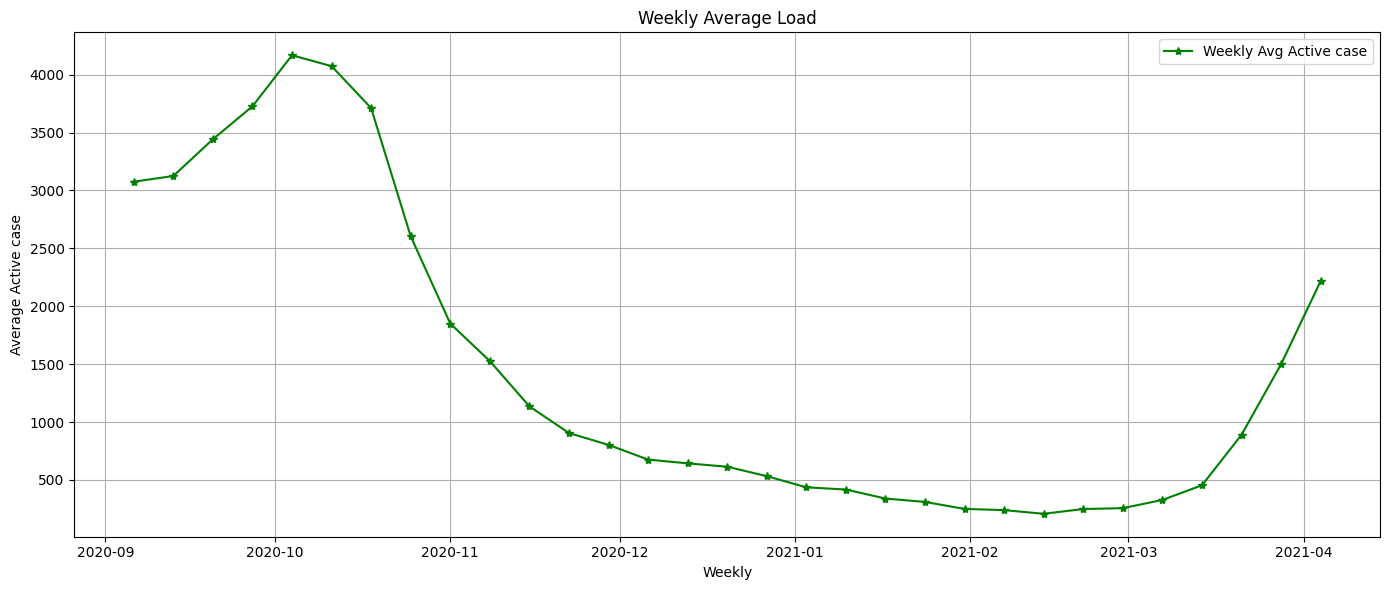

In [ ]:
weekly_avg = df['Active cases'].resample('W').mean()

# Resample by week and calculate mean
plt.figure(figsize=(14, 6))
plt.plot(weekly_avg.index, weekly_avg, marker='*', color='green', label='Weekly Avg Active case')
plt.title('Weekly Average Load')
plt.xlabel('Weekly')
plt.ylabel('Average Active case')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

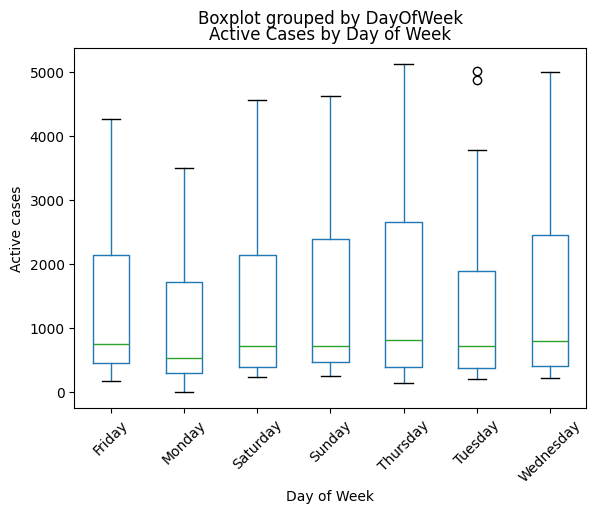

In [118]:
df['DayOfWeek'] = df.index.day_name()
#find out the count by day of week

plt.figure(figsize=(12,6))
df.boxplot(column='Active cases', by='DayOfWeek', grid=False)
plt.title("Active Cases by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Active cases")
plt.xticks(rotation=45)
plt.show()

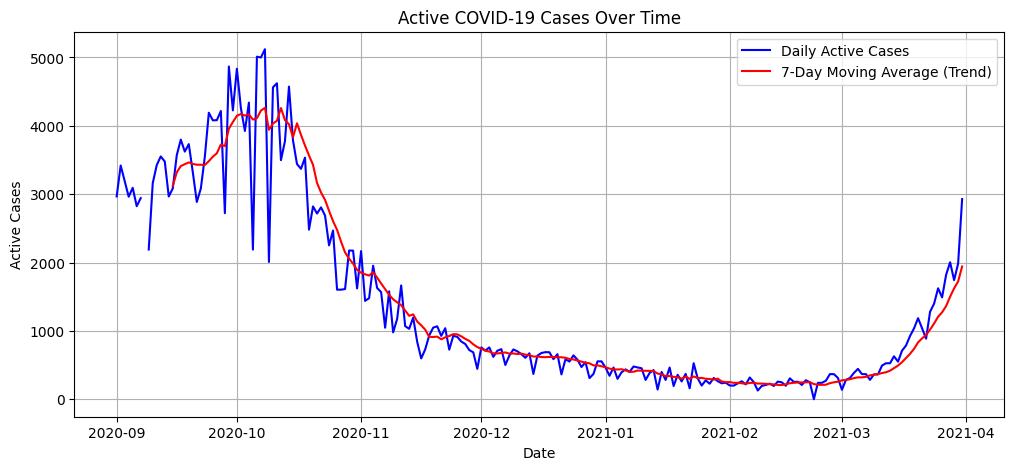

In [ ]:
# 7-day moving average
ma7 = active.rolling(window=7).mean()plt.figure(figsize=(12,5))

plt.plot(active, label='Daily Active Cases', color='blue')
plt.plot(ma7, label='7-Day Moving Average', color='red')
plt.title("Active COVID-19 Cases Over Time")
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)

plt.show()

In [50]:
# 14-day moving average (smooth trend)
ma14 = active.rolling(window=14).mean()

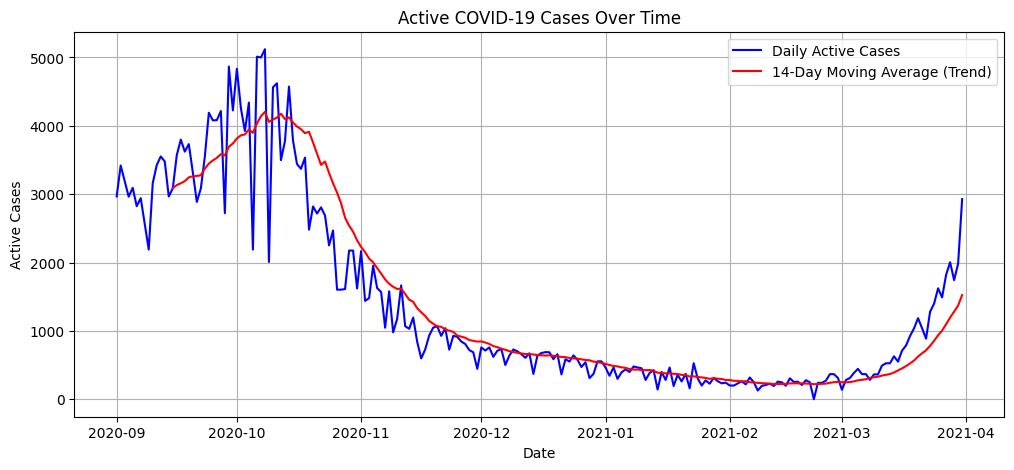

In [ ]:
# 14-day moving average (smooth trend)
ma14 = active.rolling(window=14).mean()

plt.figure(figsize=(12,5))
plt.plot(active, label='Daily Active Cases', color='blue')
plt.plot(ma14, label='14-Day Moving Average', color='red')
plt.title("Active COVID-19 Cases Over Time")
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)

plt.show()

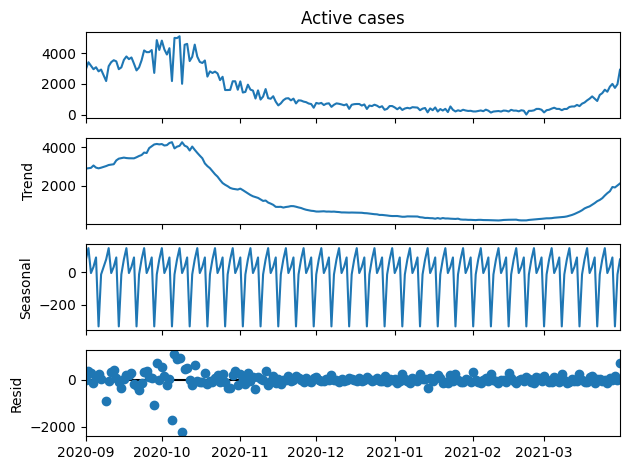

In [ ]:
#Decompose the Time Series
decomp = seasonal_decompose(active['Active cases'], model='additive', period=7, extrapolate_trend='freq')
decomp.plot()
plt.show()

In [ ]:
# Create training and testing data sets
train_end = '2021-02-28'
train = active.loc[:train_end]['Active cases']
test = active.loc['2021-03-01':]['Active cases']
print("Train length:", len(train))
print("Test length:", len(test))


Train length: 180
Test length: 31


In [ ]:
import pmdarima as pm

# auto-arima for model selection for weekly
model_auto = pm.auto_arima(train,
                           seasonal=True,
                           m=7,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(model_auto.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=2643.072, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2760.684, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2673.572, Time=1.32 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2648.287, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2758.822, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=2649.501, Time=1.92 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=2641.602, Time=1.02 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=2643.718, Time=2.35 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=2639.432, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=2685.179, Time=0.24 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=2641.420, Time=1.24 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=2641.417, Time=1.00 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=2

In [ ]:
model = pm.ARIMA(order=(1, 1, 2), seasonal_order=(1, 0, 0, 7))
model.fit(train)


ARIMA(order=(1, 1, 2), seasonal_order=(1, 0, 0, 7))

In [ ]:
# Forecast the next 7 days
forecast_7days = model.predict(n_periods=7)

# Forecast the next 14 days
forecast_14days = model.predict(n_periods=14)

# Forecast the next 30 days
forecast_30days = model.predict(n_periods=30)

print("Forecast for the next 7 days:", forecast_7days)
print("Forecast for the next 14 days:", forecast_14days)
print("Forecast for the next 30 days:", forecast_30days)


Forecast for the next 7 days: 180   150.10
181   261.98
182   253.17
183   262.22
184   300.82
185   294.35
186   259.25
dtype: float64
Forecast for the next 14 days: 180   150.10
181   261.98
182   253.17
183   262.22
184   300.82
185   294.35
186   259.25
187   173.23
188   220.09
189   208.90
190   205.54
191   217.44
192   206.59
193   182.28
dtype: float64
Forecast for the next 30 days: 180   150.10
181   261.98
182   253.17
183   262.22
184   300.82
185   294.35
186   259.25
187   173.23
188   220.09
189   208.90
190   205.54
191   217.44
192   206.59
193   182.28
194   132.54
195   148.32
196   135.29
197   126.42
198   124.75
199   112.17
200    92.79
201    61.13
202    61.42
203    47.72
204    35.95
205    27.80
206    14.23
207    -2.60
208   -25.52
209   -32.73
dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test[:7]
y_pred_7days = forecast_7days

mae_7 = mean_absolute_error(y_true, y_pred_7days)
rmse_7 = np.sqrt(mean_squared_error(y_true, y_pred_7days))

print("7 Days MAE:", mae_7)
print("7 Days RMSE:", rmse_7)


7 Days MAE: 76.61532897571922
7 Days RMSE: 89.72534108028763


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test[:14]
y_pred_14days = forecast_14days

mae_14 = mean_absolute_error(y_true, y_pred_14days)
rmse_14 = np.sqrt(mean_squared_error(y_true, y_pred_14days))

print("14 Days MAE:", mae_14)
print("14 Days RMSE:", rmse_14)

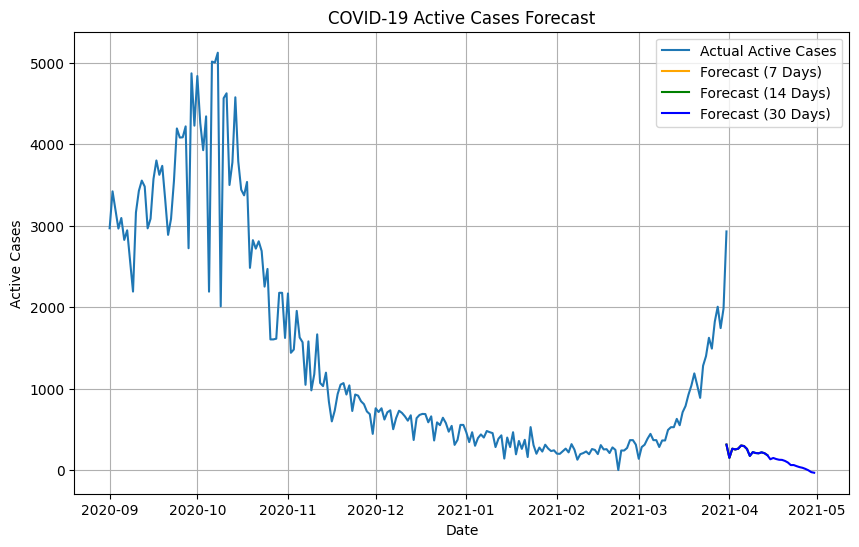

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(active.index, active['Active cases'], label='Actual Active Cases')
forecast_dates_7 = pd.date_range(start=active.index[-1], periods=8, freq='D')
plt.plot(forecast_dates_7, np.concatenate([train[-1:], forecast_7days]), label='Forecast (7 Days)', color='orange')

forecast_dates_14 = pd.date_range(start=active.index[-1], periods=15, freq='D')
plt.plot(forecast_dates_14, np.concatenate([train[-1:], forecast_14days]), label='Forecast (14 Days)', color='green')

forecast_dates_30 = pd.date_range(start=active.index[-1], periods=31, freq='D')
plt.plot(forecast_dates_30, np.concatenate([train[-1:], forecast_30days]), label='Forecast (30 Days)', color='blue')
plt.title('COVID-19 Active Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(active.index)

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-09',
               '2020-09-10', '2020-09-11',
               ...
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=211, freq=None)


In [ ]:
print(active.head())

            Active cases
Date                    
2020-09-01          2967
2020-09-02          3420
2020-09-03          3189
2020-09-04          2963
2020-09-05          3093


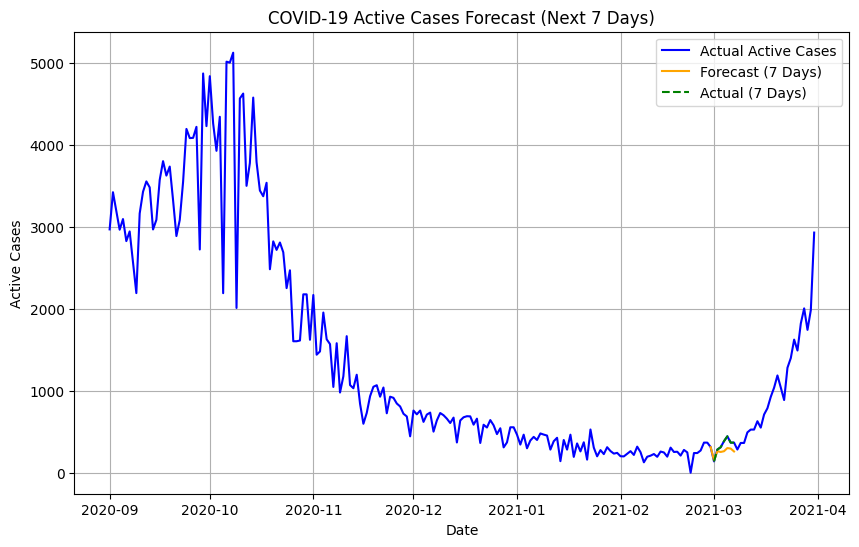

In [ ]:
forecast_dates_7 = pd.date_range(start=train.index[-1], periods=8, freq='D')
# 7 days forecast
forecast_7days_full = np.concatenate([train[-1:], forecast_7days])

plt.figure(figsize=(10, 6))
plt.plot(active.index, active['Active cases'], label='Actual Active Cases', color='blue')
plt.plot(forecast_dates_7, forecast_7days_full, label='Forecast (7 Days)', color='orange')
actual_7days = test[:7]
plt.plot(test.index[:7], actual_7days, label='Actual (7 Days)', color='green', linestyle='--')
plt.title('COVID-19 Active Cases Forecast (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


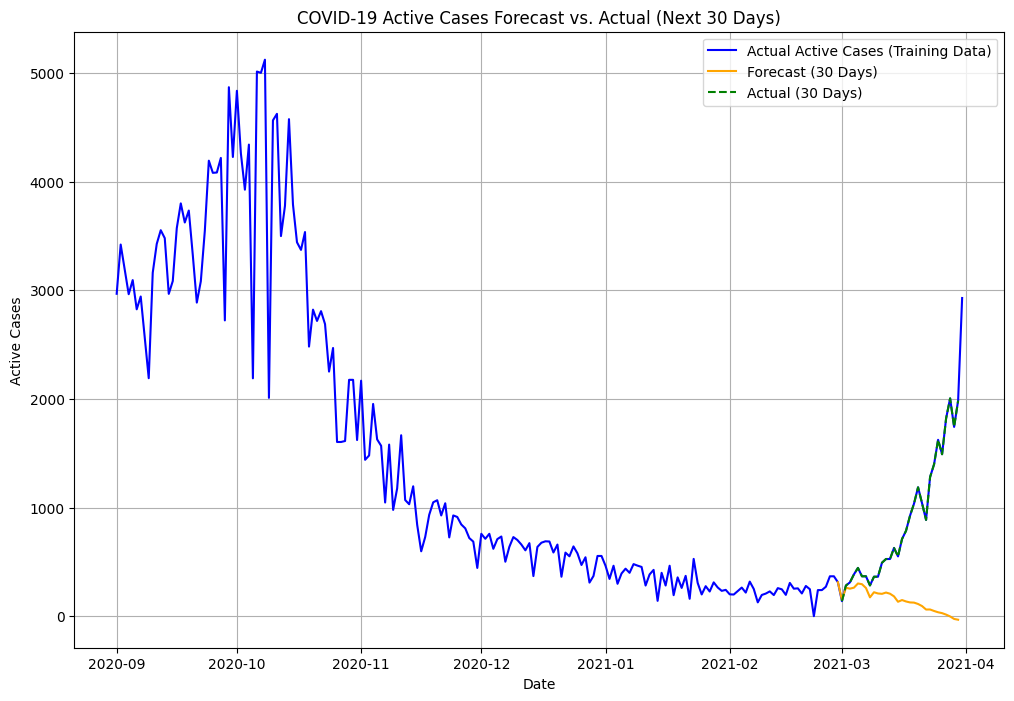

In [ ]:
forecast_dates_30 = pd.date_range(start=train.index[-1], periods=31, freq='D')
# 30 days forecast
forecast_30days_full = np.concatenate([train[-1:], forecast_30days])
actual_30days = test[:30]
plt.figure(figsize=(12, 8))
plt.plot(active.index, active['Active cases'], label='Actual Active Cases (Training Data)', color='blue')
plt.plot(forecast_dates_30, forecast_30days_full, label='Forecast (30 Days)', color='orange')
plt.plot(test.index[:30], actual_30days, label='Actual (30 Days)', color='green', linestyle='--')
plt.title('COVID-19 Active Cases Forecast vs. Actual (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'active' is the DataFrame containing 'Active cases' and a datetime index
# Forecasting 30 days
forecast_dates_14 = pd.date_range(start=train.index[-1], periods=15, freq='D')
forecast_14days_full = np.concatenate([train[-1:], forecast_14days])  # Concatenate last known value with forecasted

# Actual data for the next 30 days from the test set
actual_14days = test[:14]  # Assuming you have enough actual data for comparison

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot the actual active cases (training data)
plt.plot(active.index, active['Active cases'], label='Actual Active Cases (Training Data)', color='blue')

# Plot the forecast for the next 30 days
plt.plot(forecast_dates_14, forecast_140days_full, label='Forecast (14 Days)', color='orange')

# Plot the actual 30 days from the test data (to compare forecast with actual values)
plt.plot(test.index[:14], actual_14days, label='Actual (14 Days)', color='green', linestyle='--')

# Labels and legend
plt.title('COVID-19 Active Cases Forecast vs. Actual (Next 14 Days)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
!pip install plotly

In [109]:
import plotly.express as px
fig = px.line(df.reset_index(), x='Date', y='Active cases', title='Interactive Load Plot')
fig.show()

In [115]:
import plotly.express as px
fig = px.line(df.reset_index(), x='Date', y='Positive cases', title='Interactive Load Plot')
fig.show()

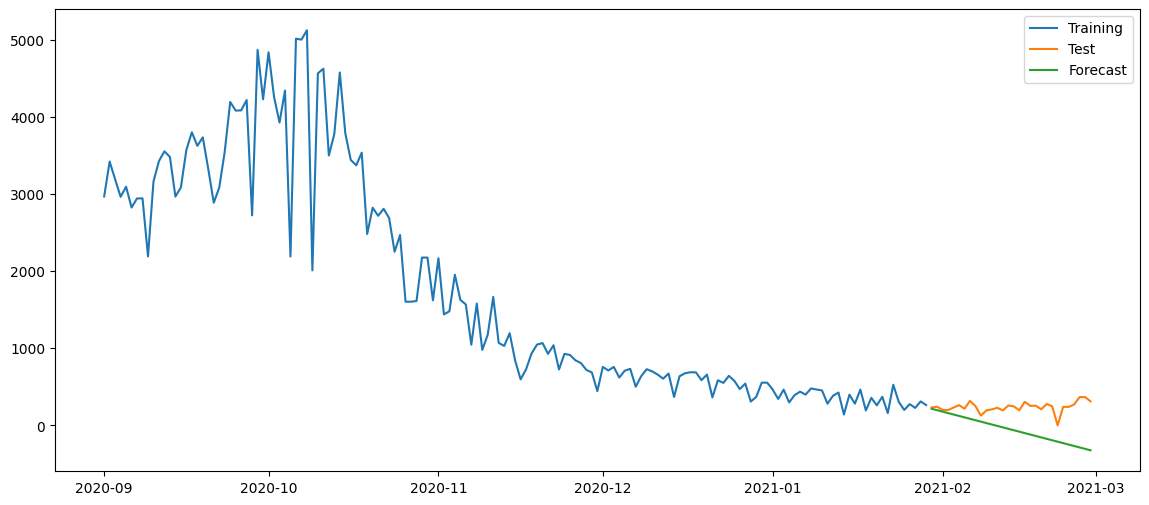

In [ ]:
# Forecast length = test size (30)
forecast_test = model.predict(n_periods=len(test))

test['Forecast'] = forecast_test

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train['Active cases'], label='Training')
plt.plot(test['Active cases'], label='Test')
plt.plot(test['Forecast'], label='Forecast')
plt.legend()
plt.show()


In [ ]:
march_forecast = forecast['2020-03-01':'2020-03-31']
march_forecast